# Practical Work 2 - Multilayer Perceptron
# Question 3 : Multilayer perceptron with two hidden layers for image classification
You will define un [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) with two hidden layers in order to classify the images from the [MNIST](http://yann.lecun.com/exdb/mnist/) database.


## Introduction - MNIST Database
Objective: use a multilayer perceptron (MLP) for the classification of the images from the MNIST database.

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box (784 values) and anti-aliased, which introduced grayscale levels. The MNIST database contains 60,000 training images and 10,000 testing images. In the original paper of the creators, they use a support-vector machine to get an error rate of 0.8%.

![mnist.png](../../fig/mnist.png)



## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Data loading ( MNIST Database )
The MNIST data are loaded and its parameters are retrieved (number of examples, of classes, size of the retina).

In [ ]:
(x_train, y_train), (x_test, y_test) =tk.datasets.mnist.load_data()

num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))/255
x_test  = x_test.reshape((num_test, num_input))/255

# Normalization
print("Size of the retina : ",num_input)
print("Number of examples : ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Size of the retina :  784
Number of examples :  60000


## Network ( Multilayer perceptron with two hidden layers )
### Parameters of the Network
- 256 neurons hidden in each hidden layer;
- learning by batches of size 100;
- 15 iterations for learning (epoch).

In [ ]:

# Parameters of the algorithm
lr = 0.001
num_epochs = 15
batch_size = 100

# Numbers of neurons for the two hidden layers
num_hidden_1 = 256 
num_hidden_2 = 256 

### Model construction
The construction of the model is done in 3 steps
- network (sequential model);
- Loss function : in the case of a classification problem, the [binary cross entropy function](https://en.wikipedia.org/wiki/Cross_entropy) calculated between the labelissed output and the output predicted by the model is used;
- Optimization procedure : gradient descent by [the Adam technique](https://arxiv.org/abs/1412.6980).

In [ ]:
# Model definition
model = Sequential()
model.add(Dense(input_dim=num_input,units=num_hidden_1,activation='relu',name='dense1'))
model.add(Dense(input_dim=num_hidden_1,units=num_hidden_2,activation='relu',name='dense2'))
model.add(Dense(input_dim=num_hidden_2,units=num_classes,activation='softmax',name='output'))

# Prints a string summary of the network.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
dense2 (Dense)               (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Loss function and optimization procedure 
adam = Adam(lr=lr)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])

### Training the model

Trains the model for a fixed number of epochs (iterations on a dataset) by use the Keras function [<code>fit</code>](https://keras.io/api/models/model_training_apis/#fit-method).

In [1]:
# Model training
hist=model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size,verbose=1)

NameError: ignored

### Results (Accuracy on the training database)

In [ ]:
# Accuracy on the training database
print("Accuracy on the training database ={0:5.3f} ".format(hist.history.get('acc')[-1]))

Accuracy on the training database =0.997 


### Results on the test database
Return the loss value & metrics values for the model in test mode  by use the Keras function [<code>evaluate</code>](https://keras.io/api/models/model_training_apis/#evaluate-method).

313/313 [==============================] - 0s 507us/step - loss: 0.0158 - acc: 0.9819


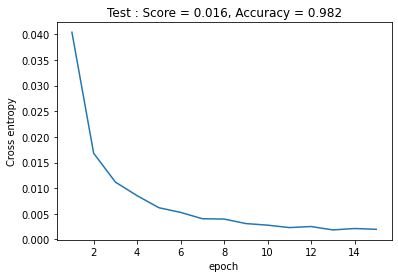

Number of errors 181/10000




<Figure size 432x288 with 0 Axes>

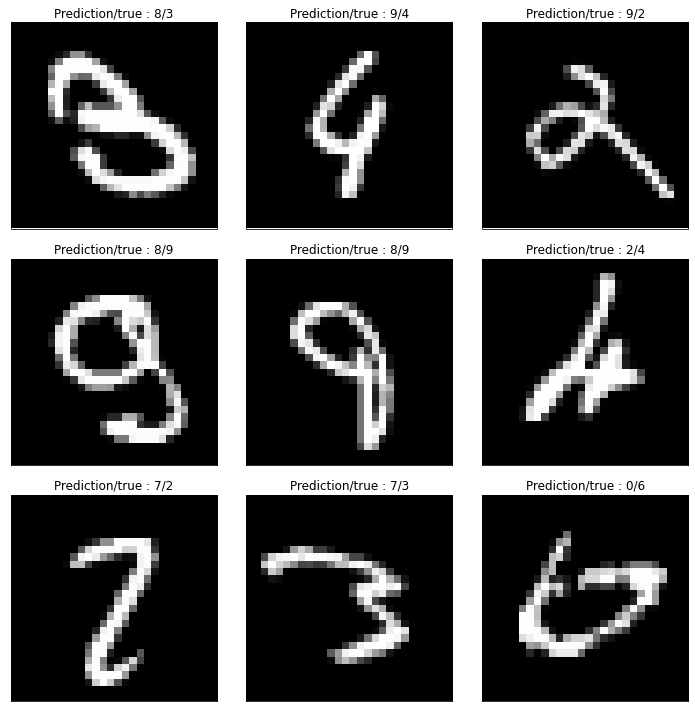

In [ ]:
score = model.evaluate(x_test,y_test)

x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.subplots(1,1)
plt.xlabel('epoch')
plt.ylabel('Cross entropy')
plt.title("Test : Score = {0:5.3f}, Accuracy = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prediction/true : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Number of errors {}/{}\n\n".format(incorrects.size,y.size))
